# Exoplanets confirmation values and habitability

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, make_scorer, balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
import statsmodels.api as sm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/My Drive/Datasets/PHL_dataset.csv")
df.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [4]:
Null_values=list(zip(df.columns.values.tolist(),df.isnull().sum().tolist()))
Null_values

[('P_NAME', 0),
 ('P_STATUS', 0),
 ('P_MASS', 2450),
 ('P_MASS_ERROR_MIN', 2581),
 ('P_MASS_ERROR_MAX', 2581),
 ('P_RADIUS', 909),
 ('P_RADIUS_ERROR_MIN', 943),
 ('P_RADIUS_ERROR_MAX', 943),
 ('P_YEAR', 0),
 ('P_UPDATED', 0),
 ('P_PERIOD', 110),
 ('P_PERIOD_ERROR_MIN', 241),
 ('P_PERIOD_ERROR_MAX', 241),
 ('P_SEMI_MAJOR_AXIS', 1681),
 ('P_SEMI_MAJOR_AXIS_ERROR_MIN', 2485),
 ('P_SEMI_MAJOR_AXIS_ERROR_MAX', 2484),
 ('P_ECCENTRICITY', 2668),
 ('P_ECCENTRICITY_ERROR_MIN', 3077),
 ('P_ECCENTRICITY_ERROR_MAX', 3077),
 ('P_INCLINATION', 3204),
 ('P_INCLINATION_ERROR_MIN', 3236),
 ('P_INCLINATION_ERROR_MAX', 3238),
 ('P_OMEGA', 3302),
 ('P_OMEGA_ERROR_MIN', 3355),
 ('P_OMEGA_ERROR_MAX', 3355),
 ('P_TPERI', 3567),
 ('P_TPERI_ERROR_MIN', 3576),
 ('P_TPERI_ERROR_MAX', 3576),
 ('P_ANGULAR_DISTANCE', 1687),
 ('P_IMPACT_PARAMETER', 2639),
 ('P_IMPACT_PARAMETER_ERROR_MIN', 2641),
 ('P_IMPACT_PARAMETER_ERROR_MAX', 2641),
 ('P_TEMP_MEASURED', 4043),
 ('P_GEO_ALBEDO', 4048),
 ('P_GEO_ALBEDO_ERROR_MIN', 

In [5]:
j=0
for i in df.columns.values.tolist():
    if Null_values[j][1]>=df.shape[0]*0.1225:      
        df = df.drop(columns=i)
    j=j+1

m = np.core.defchararray.find(df.columns.values.astype(str), 'ERROR') >= 0
df=df.loc[:,~m]

df=df.dropna()
df[df != 'nan']

,P_NAME,P_STATUS,P_YEAR,P_UPDATED,P_PERIOD,P_DETECTION,S_NAME,S_RA,S_DEC,S_MAG,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,2007,2014-05-14,326.03000,Radial Velocity,11 Com,185.179280,17.792868,4.740,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.863300,1.290
1,11 UMi b,3.0,2009,2018-09-06,516.21997,Radial Velocity,11 UMi,229.274540,71.823898,5.016,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.784800,1.530
2,14 And b,3.0,2008,2014-05-14,185.84000,Radial Velocity,14 And,352.822570,39.236198,5.227,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.574400,0.830
3,14 Her b,3.0,2002,2018-09-06,1773.40000,Radial Velocity,14 Her,242.601300,43.817646,6.610,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.078500,2.930
4,16 Cyg B b,3.0,1996,2018-09-06,798.50000,Radial Velocity,16 Cyg B,295.466550,50.517525,6.250,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.733850,1.660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,tau Cet e,3.0,2017,2017-08-17,162.87000,Radial Velocity,tau Cet,26.017012,-15.937480,3.500,...,0,Warm,1,0.737081,Cetus,Cet,Whale,1.809973,3.931532,0.538
4036,tau Cet f,3.0,2017,2017-08-17,636.13000,Radial Velocity,tau Cet,26.017012,-15.937480,3.500,...,0,Cold,0,0.538662,Cetus,Cet,Whale,1.809973,3.931532,1.334
4037,tau Cet g,3.0,2017,2017-08-17,20.00000,Radial Velocity,tau Cet,26.017012,-15.937480,3.500,...,0,Hot,0,0.342664,Cetus,Cet,Whale,1.178565,1.751232,0.133
4038,tau Cet h,3.0,2017,2017-08-17,49.41000,Radial Velocity,tau Cet,26.017012,-15.937480,3.500,...,0,Hot,0,0.446574,Cetus,Cet,Whale,1.193246,1.830689,0.243


### Correlations

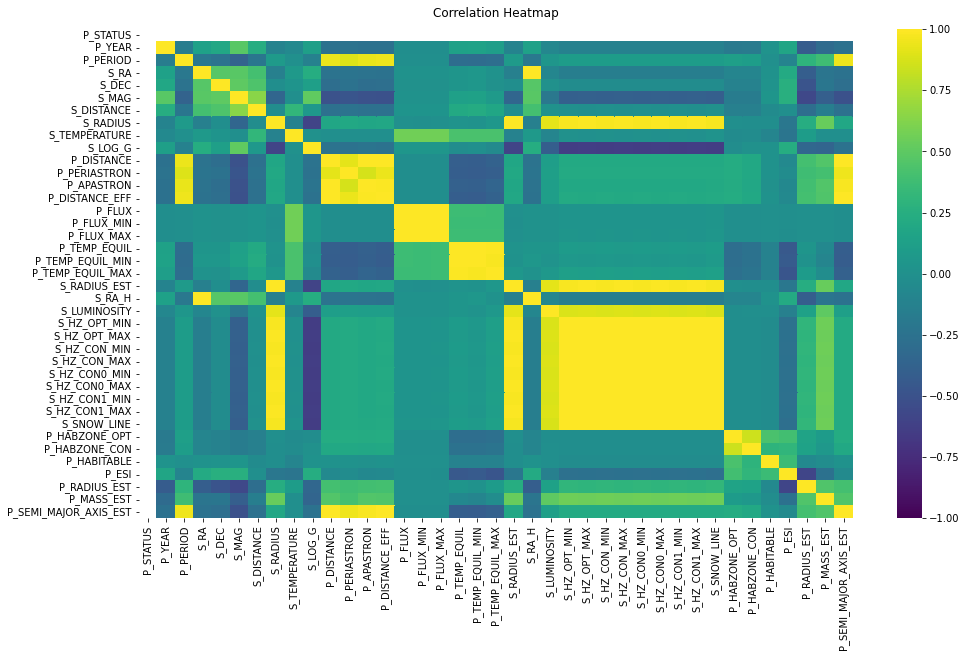

In [6]:
plt.figure(figsize=(16,9))

heatmap = sns.heatmap(df.corr(), vmin=-1,vmax=1, annot=False, cmap='viridis')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

Here is observed that the P_HABITABLE which confirm the exoplanet as non-habitable(0), conservatively habitable (1), optmistically habitable(2) is strongly correlated to:
* P_HABZONE_OPT
* P_HABZONE_CON
* P_ESI

In the other hand, the predictor components have correlations of 1 in some cases so the information obtained is duplicated. That ones are:

* P_SEMI_MAJOR_AXIS_EST, P_DISTANCE, P_APASTRON, P_DISTANCE_EFF
* P_FLUX, P_FLUX_MAX, P_FLUX_MIN
* P_TEMP_EQUIL, P_TEMP_EQUIL_MAX, P_TEMP_EQUIL_MIN
* S_RA, S_RA_H
* S_RADIUS, S_RADIUS_EST, S_HZ_OPT_MIN, S_HZ_OPT_MAX, S_HZ_CON0_MIN, S_HZ_CON0_MAX, S_HZ_CON1_MIN, S_HZ_CON1_MAX, S_SNOW_LINE

Is worth keeping only one of each group.
Will drop the coordenates of the Star because that doesn't give information of habitability just location:

* S_RA, S_RA_H, S_DEC, S_RA_T, S_DEC_T

In [7]:
df = df.drop(columns=['P_DISTANCE', 'P_APASTRON', 'P_DISTANCE_EFF', 'P_FLUX_MAX', 'P_FLUX_MIN',
                      'P_TEMP_EQUIL_MAX', 'P_TEMP_EQUIL_MIN','S_RA','S_DEC','S_RA_H','S_RA_T','S_DEC_T', 'S_RADIUS_EST', 'S_HZ_OPT_MIN',
                      'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX','S_HZ_CON0_MIN', 'S_HZ_CON0_MAX',
                      'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE'])
df["P_TYPE_TEMP"] = LabelEncoder().fit_transform(df["P_TYPE_TEMP"])
df["P_TYPE"] = LabelEncoder().fit_transform(df["P_TYPE"])
df["S_TYPE_TEMP"] = LabelEncoder().fit_transform(df["S_TYPE_TEMP"])
df["P_DETECTION"] = LabelEncoder().fit_transform(df["P_DETECTION"])
df.head()

,P_NAME,P_STATUS,P_YEAR,P_UPDATED,P_PERIOD,P_DETECTION,S_NAME,S_MAG,S_DISTANCE,S_RADIUS,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,2007,2014-05-14,326.03000,2,11 Com,4.740,93.37,19.00,...,0,1,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,2009,2018-09-06,516.21997,2,11 UMi,5.016,125.72,29.79,...,0,1,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,2008,2014-05-14,185.84000,2,14 And,5.227,75.59,11.00,...,0,1,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,2002,2018-09-06,1773.40000,2,14 Her,6.610,17.94,0.93,...,0,0,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,1996,2018-09-06,798.50000,2,16 Cyg B,6.250,21.15,1.13,...,1,2,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


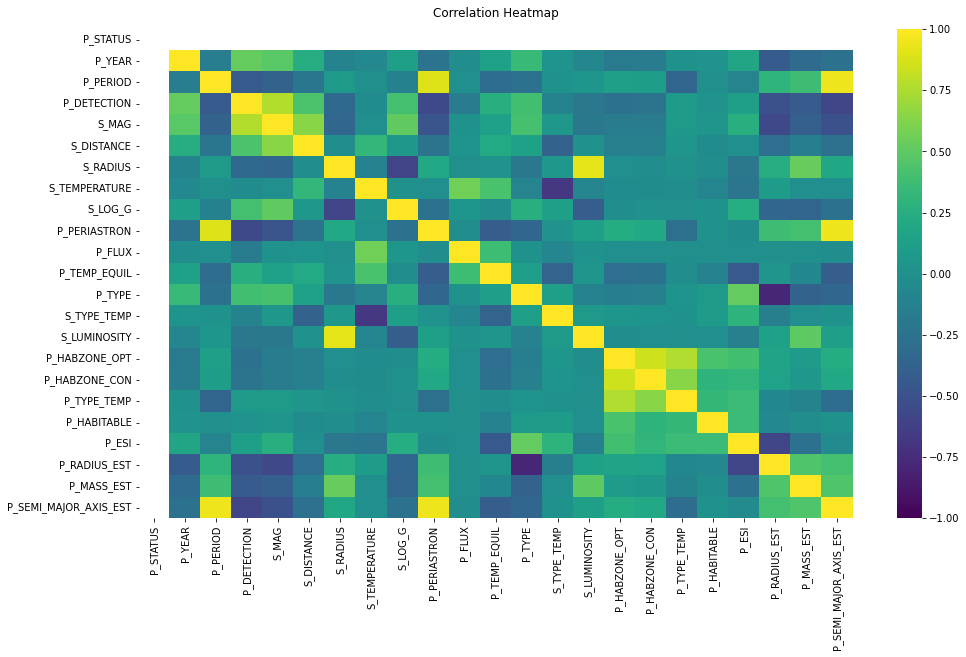

In [8]:
plt.figure(figsize=(16,9))

heatmap = sns.heatmap(df.corr(), vmin=-1,vmax=1, annot=False, cmap='viridis')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

With the known correlations of 'P_HABITABLE' and 'P_ESI' is accurate to say that the most important factors for habitability are:

* S_MAG
* S_LOG_G
* S_TYPE_TEMP // S_TEMPERATURE
* P_TYPE_TEMP // P_TEMP_EQUIL
* P_TYPE

Added to the three previous values the most important factors are some properties of the star and type and temperature of the planet. 

## Visualzation

In [9]:
fig1 = px.density_heatmap(df, x='S_MAG', y='S_LOG_G', z='P_HABITABLE')
fig2 = px.density_heatmap(df,x='P_TYPE',y='P_TYPE_TEMP',z='P_HABITABLE')
fig3 = px.scatter(df,x='P_TEMP_EQUIL',y='P_ESI',color='P_HABITABLE')
fig4 = px.density_heatmap(df,x='P_SEMI_MAJOR_AXIS_EST',y='S_TYPE_TEMP',z='P_HABITABLE')

fig1.show()
fig2.show()
fig3.show()
fig4.show()

## Classification

In [10]:
df.columns.values.tolist()

['P_NAME',
 'P_STATUS',
 'P_YEAR',
 'P_UPDATED',
 'P_PERIOD',
 'P_DETECTION',
 'S_NAME',
 'S_MAG',
 'S_DISTANCE',
 'S_RADIUS',
 'S_TEMPERATURE',
 'S_LOG_G',
 'S_ALT_NAMES',
 'P_PERIASTRON',
 'P_FLUX',
 'P_TEMP_EQUIL',
 'P_TYPE',
 'S_TYPE_TEMP',
 'S_LUMINOSITY',
 'P_HABZONE_OPT',
 'P_HABZONE_CON',
 'P_TYPE_TEMP',
 'P_HABITABLE',
 'P_ESI',
 'S_CONSTELLATION',
 'S_CONSTELLATION_ABR',
 'S_CONSTELLATION_ENG',
 'P_RADIUS_EST',
 'P_MASS_EST',
 'P_SEMI_MAJOR_AXIS_EST']

### Train Test Split

In [11]:
Target = df.P_HABITABLE
Predictors = df.drop(columns=['P_NAME','P_YEAR','P_DETECTION','S_NAME','S_ALT_NAMES','S_CONSTELLATION','S_CONSTELLATION_ABR',
                              'S_CONSTELLATION_ENG','P_UPDATED','P_HABITABLE'])

X_tr1, X_tst1, Y_tr1, Y_tst1 = train_test_split(Predictors,Target, random_state=0)
X_tr2, X_tst2, Y_tr2, Y_tst2 = train_test_split(Predictors,Target, random_state=10)
X_tr3, X_tst3, Y_tr3, Y_tst3 = train_test_split(Predictors,Target, random_state=42)

# Decision Tree Classifier

Errors = (0.00, 0.48, 0.12)%
Mean Error = 0.20 %


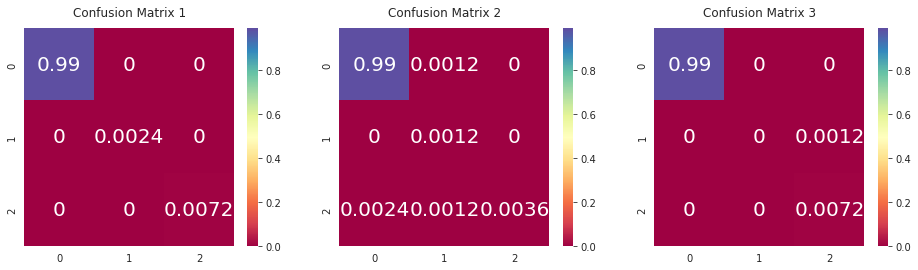

In [12]:
DTR = DecisionTreeClassifier()

DTR.fit(X_tr1,Y_tr1)
Y_pred1 = DTR.predict(X_tst1)
DTR.fit(X_tr2,Y_tr2)
Y_pred2 = DTR.predict(X_tst2)
DTR.fit(X_tr3,Y_tr3)
Y_pred3 = DTR.predict(X_tst3)

conf_mat1 = confusion_matrix(Y_tst1,Y_pred1, normalize='all')
conf_mat2 = confusion_matrix(Y_tst2,Y_pred2, normalize='all')
conf_mat3 = confusion_matrix(Y_tst3,Y_pred3, normalize='all')

sns.set_style(style='dark')
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(16,4))
sns.heatmap(ax=ax1, data=conf_mat1, vmin=np.min(conf_mat1.all()),vmax=np.max(conf_mat1), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
ax1.set_title('Confusion Matrix 1', fontdict={'fontsize':12}, pad=12)
sns.heatmap(ax=ax2,data=conf_mat2, vmin=np.min(conf_mat2.all()),vmax=np.max(conf_mat2), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
ax2.set_title('Confusion Matrix 2', fontdict={'fontsize':12}, pad=12)
sns.heatmap(ax=ax3,data=conf_mat3, vmin=np.min(conf_mat3.all()),vmax=np.max(conf_mat3), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
ax3.set_title('Confusion Matrix 3', fontdict={'fontsize':12}, pad=12)

error1= (1-np.diag(conf_mat1).sum())*100
error2= (1-np.diag(conf_mat2).sum())*100
error3= (1-np.diag(conf_mat3).sum())*100
mean_error = np.mean([error1,error2,error3])
print("Errors = ({0:.2f}, {1:.2f}, {2:.2f})%".format(error1,error2,error3))
print("Mean Error = {:.2f} %".format(mean_error))

In [13]:
print(metrics.accuracy_score(Y_tst1, Y_pred1))
print(metrics.precision_score(Y_tst1, Y_pred1, average='weighted', labels=np.unique(Y_pred1)))
print(metrics.recall_score(Y_tst1, Y_pred1, average='weighted', labels=np.unique(Y_pred1)))
print(metrics.f1_score(Y_tst1, Y_pred1, average='weighted', labels=np.unique(Y_pred1)))

1.0
1.0
1.0
1.0


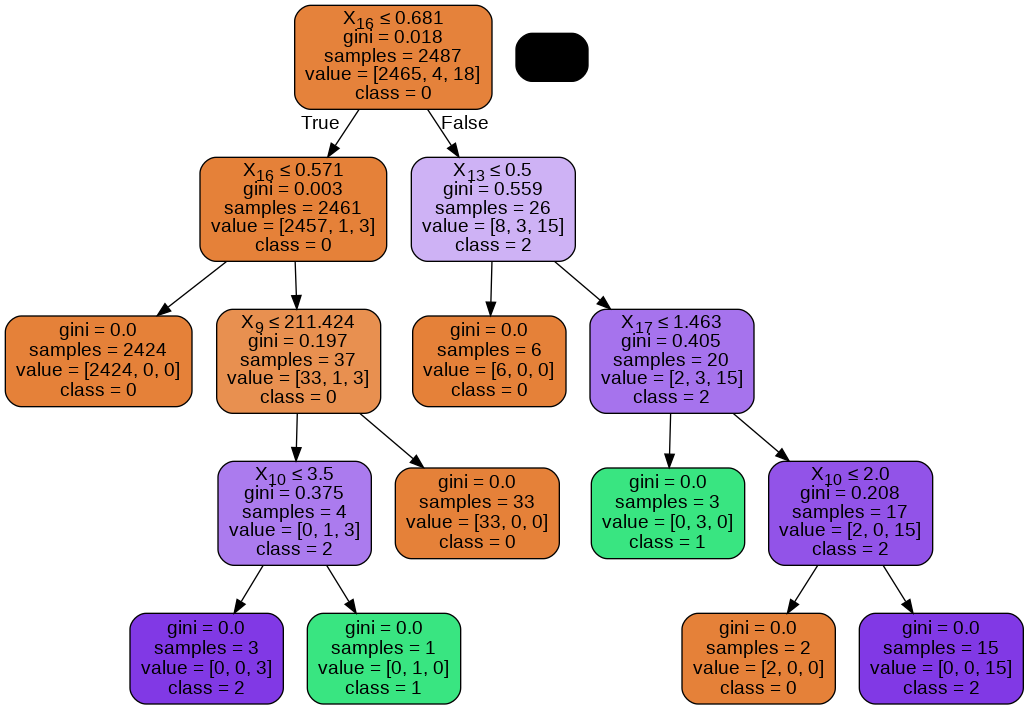

In [14]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(DTR, out_file=dot_data, filled=True, rounded=True, special_characters=True, class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('graph.png')
Image(graph.create_png())

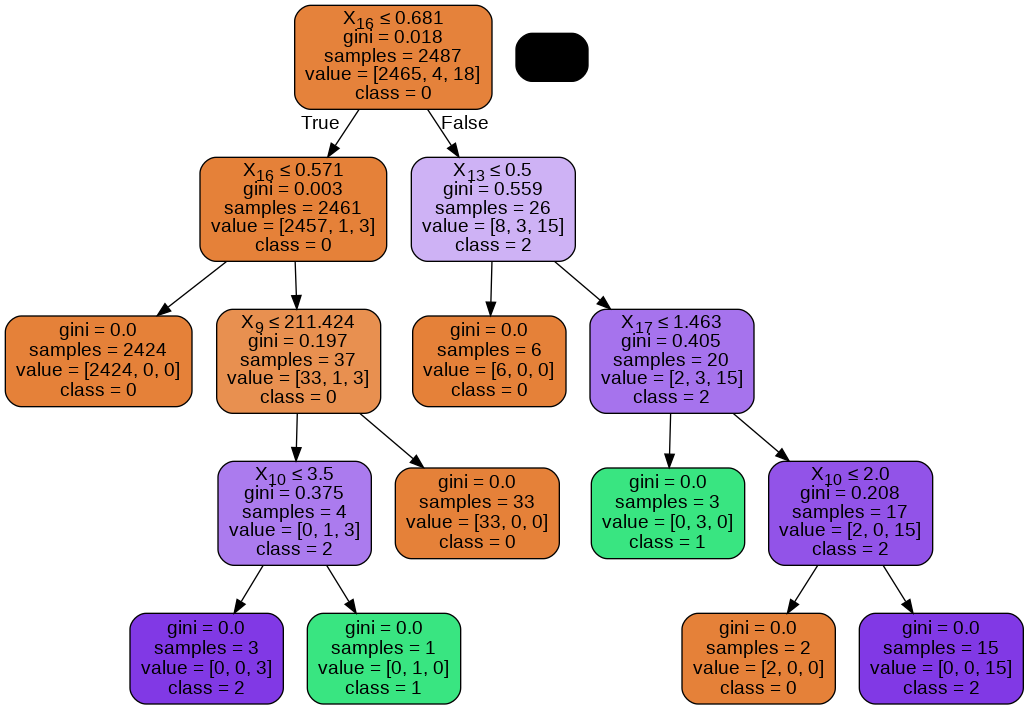

In [15]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DTR, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('graph2.png')
Image(graph.create_png())

## Random Forest Classifier

Errors = (0.24, 0.12, 0.12)%
Mean Error = 0.16 %


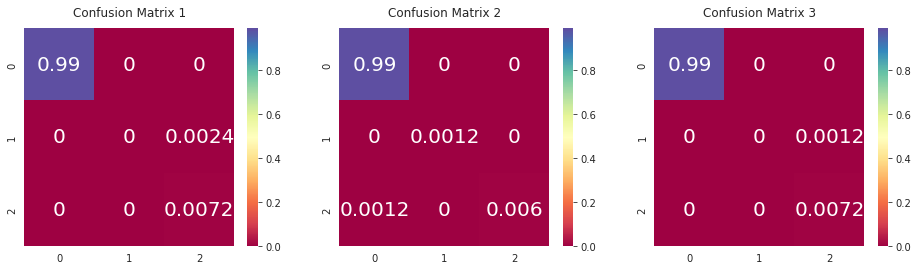

In [16]:
RFC = RandomForestClassifier(n_jobs=2)

RFC.fit(X_tr1,Y_tr1)
Y_pred1 = RFC.predict(X_tst1)
RFC.fit(X_tr2,Y_tr2)
Y_pred2 = RFC.predict(X_tst2)
RFC.fit(X_tr3,Y_tr3)
Y_pred3 = RFC.predict(X_tst3)

conf_mat1 = confusion_matrix(Y_tst1,Y_pred1, normalize='all')
conf_mat2 = confusion_matrix(Y_tst2,Y_pred2, normalize='all')
conf_mat3 = confusion_matrix(Y_tst3,Y_pred3, normalize='all')

sns.set_style(style='dark')
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(16,4))
sns.heatmap(ax=ax1, data=conf_mat1, vmin=np.min(conf_mat1.all()),vmax=np.max(conf_mat1), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
ax1.set_title('Confusion Matrix 1', fontdict={'fontsize':12}, pad=12)
sns.heatmap(ax=ax2,data=conf_mat2, vmin=np.min(conf_mat2.all()),vmax=np.max(conf_mat2), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
ax2.set_title('Confusion Matrix 2', fontdict={'fontsize':12}, pad=12)
sns.heatmap(ax=ax3,data=conf_mat3, vmin=np.min(conf_mat3.all()),vmax=np.max(conf_mat3), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
ax3.set_title('Confusion Matrix 3', fontdict={'fontsize':12}, pad=12)

error1= (1-np.diag(conf_mat1).sum())*100
error2= (1-np.diag(conf_mat2).sum())*100
error3= (1-np.diag(conf_mat3).sum())*100
mean_error = np.mean([error1,error2,error3])
print("Errors = ({0:.2f}, {1:.2f}, {2:.2f})%".format(error1,error2,error3))
print("Mean Error = {:.2f} %".format(mean_error))

In [17]:
print(metrics.accuracy_score(Y_tst1, Y_pred1))
print(metrics.precision_score(Y_tst1, Y_pred1, average='weighted', labels=np.unique(Y_pred1)))
print(metrics.recall_score(Y_tst1, Y_pred1, average='weighted', labels=np.unique(Y_pred1)))
print(metrics.f1_score(Y_tst1, Y_pred1, average='weighted', labels=np.unique(Y_pred1)))

0.9975903614457832
0.9981884057971014
1.0
0.9989648033126294


## KNN Classifier

Errors = (0.96, 0.84, 0.84)%
Mean Error = 0.88 %


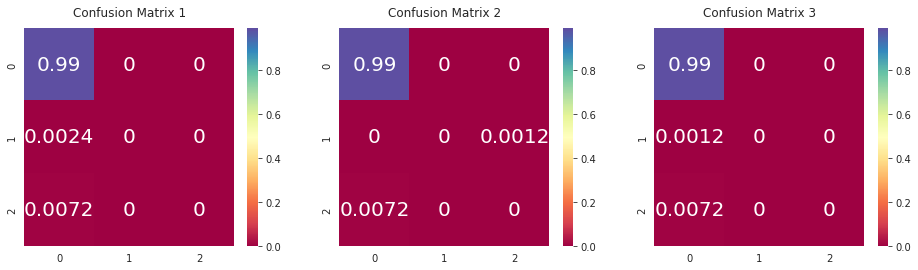

In [18]:
KNNC = KNeighborsClassifier(n_jobs=3)

KNNC.fit(X_tr1,Y_tr1)
Y_pred1 = KNNC.predict(X_tst1)
KNNC.fit(X_tr2,Y_tr2)
Y_pred2 = KNNC.predict(X_tst2)
KNNC.fit(X_tr3,Y_tr3)
Y_pred3 = KNNC.predict(X_tst3)

conf_mat1 = confusion_matrix(Y_tst1,Y_pred1, normalize='all')
conf_mat2 = confusion_matrix(Y_tst2,Y_pred2, normalize='all')
conf_mat3 = confusion_matrix(Y_tst3,Y_pred3, normalize='all')

sns.set_style(style='dark')
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(16,4))
sns.heatmap(ax=ax1, data=conf_mat1, vmin=np.min(conf_mat1.all()),vmax=np.max(conf_mat1), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
ax1.set_title('Confusion Matrix 1', fontdict={'fontsize':12}, pad=12)
sns.heatmap(ax=ax2,data=conf_mat2, vmin=np.min(conf_mat2.all()),vmax=np.max(conf_mat2), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
ax2.set_title('Confusion Matrix 2', fontdict={'fontsize':12}, pad=12)
sns.heatmap(ax=ax3,data=conf_mat3, vmin=np.min(conf_mat3.all()),vmax=np.max(conf_mat3), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
ax3.set_title('Confusion Matrix 3', fontdict={'fontsize':12}, pad=12)

error1= (1-np.diag(conf_mat1).sum())*100
error2= (1-np.diag(conf_mat2).sum())*100
error3= (1-np.diag(conf_mat3).sum())*100
mean_error = np.mean([error1,error2,error3])
print("Errors = ({0:.2f}, {1:.2f}, {2:.2f})%".format(error1,error2,error3))
print("Mean Error = {:.2f} %".format(mean_error))

In [19]:
print(metrics.accuracy_score(Y_tst1, Y_pred1))
print(metrics.precision_score(Y_tst1, Y_pred1, average='weighted', labels=np.unique(Y_pred1)))
print(metrics.recall_score(Y_tst1, Y_pred1, average='weighted', labels=np.unique(Y_pred1)))
print(metrics.f1_score(Y_tst1, Y_pred1, average='weighted', labels=np.unique(Y_pred1)))

0.9903614457831326
0.9903614457831327
1.0
0.9951573849878935


## Support Vector Classifier ( Repeated here from SVM.ipynb for simplicity)

Errors = (0.24, 0.24, 0.12)%
Mean Error = 0.20 %


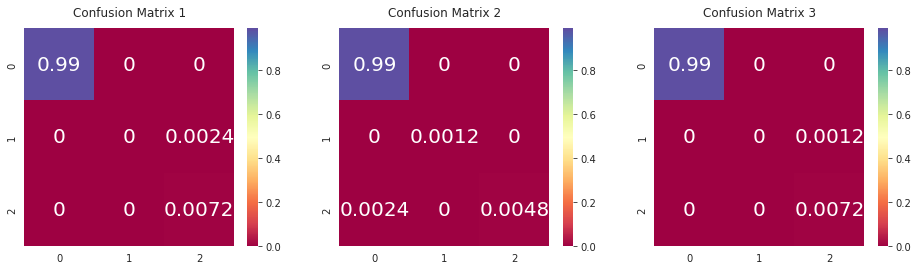

In [20]:
SVCC = SVC(kernel='linear',C=100)

SVCC.fit(X_tr1,Y_tr1)
Y_pred1 = SVCC.predict(X_tst1)
SVCC.fit(X_tr2,Y_tr2)
Y_pred2 = SVCC.predict(X_tst2)
SVCC.fit(X_tr3,Y_tr3)
Y_pred3 = SVCC.predict(X_tst3)

conf_mat1 = confusion_matrix(Y_tst1,Y_pred1, normalize='all')
conf_mat2 = confusion_matrix(Y_tst2,Y_pred2, normalize='all')
conf_mat3 = confusion_matrix(Y_tst3,Y_pred3, normalize='all')

sns.set_style(style='dark')
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(16,4))
sns.heatmap(ax=ax1, data=conf_mat1, vmin=np.min(conf_mat1.all()),vmax=np.max(conf_mat1), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
ax1.set_title('Confusion Matrix 1', fontdict={'fontsize':12}, pad=12)
sns.heatmap(ax=ax2,data=conf_mat2, vmin=np.min(conf_mat2.all()),vmax=np.max(conf_mat2), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
ax2.set_title('Confusion Matrix 2', fontdict={'fontsize':12}, pad=12)
sns.heatmap(ax=ax3,data=conf_mat3, vmin=np.min(conf_mat3.all()),vmax=np.max(conf_mat3), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
ax3.set_title('Confusion Matrix 3', fontdict={'fontsize':12}, pad=12)

error1= (1-np.diag(conf_mat1).sum())*100
error2= (1-np.diag(conf_mat2).sum())*100
error3= (1-np.diag(conf_mat3).sum())*100
mean_error = np.mean([error1,error2,error3])
print("Errors = ({0:.2f}, {1:.2f}, {2:.2f})%".format(error1,error2,error3))
print("Mean Error = {:.2f} %".format(mean_error))

In [21]:
print(metrics.accuracy_score(Y_tst1, Y_pred1))
print(metrics.precision_score(Y_tst1, Y_pred1, average='weighted', labels=np.unique(Y_pred1)))
print(metrics.recall_score(Y_tst1, Y_pred1, average='weighted', labels=np.unique(Y_pred1)))
print(metrics.f1_score(Y_tst1, Y_pred1, average='weighted', labels=np.unique(Y_pred1)))

0.9975903614457832
0.9981884057971014
1.0
0.9989648033126294


Errors = (0.96, 0.84, 0.84)%
Mean Error = 0.88 %


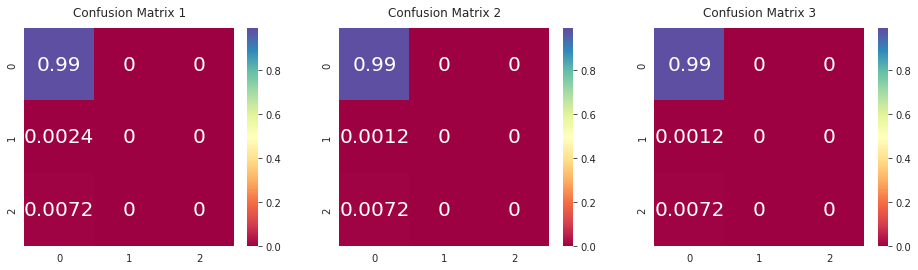

In [22]:
SVCC = SVC(kernel='rbf',C=100)

SVCC.fit(X_tr1,Y_tr1)
Y_pred1 = SVCC.predict(X_tst1)
SVCC.fit(X_tr2,Y_tr2)
Y_pred2 = SVCC.predict(X_tst2)
SVCC.fit(X_tr3,Y_tr3)
Y_pred3 = SVCC.predict(X_tst3)

conf_mat1 = confusion_matrix(Y_tst1,Y_pred1, normalize='all')
conf_mat2 = confusion_matrix(Y_tst2,Y_pred2, normalize='all')
conf_mat3 = confusion_matrix(Y_tst3,Y_pred3, normalize='all')

sns.set_style(style='dark')
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(16,4))
sns.heatmap(ax=ax1, data=conf_mat1, vmin=np.min(conf_mat1.all()),vmax=np.max(conf_mat1), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
ax1.set_title('Confusion Matrix 1', fontdict={'fontsize':12}, pad=12)
sns.heatmap(ax=ax2,data=conf_mat2, vmin=np.min(conf_mat2.all()),vmax=np.max(conf_mat2), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
ax2.set_title('Confusion Matrix 2', fontdict={'fontsize':12}, pad=12)
sns.heatmap(ax=ax3,data=conf_mat3, vmin=np.min(conf_mat3.all()),vmax=np.max(conf_mat3), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
ax3.set_title('Confusion Matrix 3', fontdict={'fontsize':12}, pad=12)

error1= (1-np.diag(conf_mat1).sum())*100
error2= (1-np.diag(conf_mat2).sum())*100
error3= (1-np.diag(conf_mat3).sum())*100
mean_error = np.mean([error1,error2,error3])
print("Errors = ({0:.2f}, {1:.2f}, {2:.2f})%".format(error1,error2,error3))
print("Mean Error = {:.2f} %".format(mean_error))

In [23]:
print(metrics.accuracy_score(Y_tst1, Y_pred1))
print(metrics.precision_score(Y_tst1, Y_pred1, average='weighted', labels=np.unique(Y_pred1)))
print(metrics.recall_score(Y_tst1, Y_pred1, average='weighted', labels=np.unique(Y_pred1)))
print(metrics.f1_score(Y_tst1, Y_pred1, average='weighted', labels=np.unique(Y_pred1)))

0.9903614457831326
0.9903614457831327
1.0
0.9951573849878935


# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_tr1, Y_tr1)
y_pred_l = lr.predict(X_tst1)

lr_acc = round(lr.score(X_tr1, Y_tr1) * 100, 2)
lr_acc_test = round(accuracy_score(Y_tst1, y_pred_l) * 100, 2)
print(f'Train Accuracy of Logistic Regression: % {lr_acc}')
print(f'Test Accuracy of Logistic Regression: % {lr_acc_test}')

# Get precision, recall, and f1
precision, recall, f1, support = score(Y_tst1, y_pred_l, average = 'macro')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1}')

Train Accuracy of Logistic Regression: % 99.48
Test Accuracy of Logistic Regression: % 99.04
Precision : 0.44282632146709816
Recall : 0.44363341443633414
F1-score : 0.4432293776157688


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [26]:
from collections import Counter
tst = list()
for i in Y_tst1:
  if(i==0 or i==2):
    tst.append(i)
  else:
    tst.append(2)
Counter(tst)

Counter({0: 822, 2: 8})

In [27]:
Counter(y_pred_l)

Counter({0: 824, 2: 6})

In [28]:
set(Y_tst1) - set(y_pred_l)
import warnings
from sklearn import metrics
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
metrics.f1_score(Y_tst1, y_pred_l, average='weighted', labels=np.unique(y_pred_l))

0.9915502961358525

In [29]:
metrics.precision_score(Y_tst1, y_pred_l, average='weighted', labels=np.unique(y_pred_l))

0.9903498897800291

In [30]:
metrics.recall_score(Y_tst1, y_pred_l, average='weighted', labels=np.unique(y_pred_l))

0.9927536231884058

# Neural Network

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_shape=(20,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f1fb2f8dd30>>

In [32]:
from sklearn.metrics import confusion_matrix
Y_pred1 = model.predict(X_tst1)
for i in range(len(Y_pred1)):
  if(Y_pred1[i] < 0.5):
    Y_pred1[i] = 0
  else:
    Y_pred1[i] = 1
confusion_matrix(Y_pred1, Y_tst1)

26/26 [==============================] - 0s 2ms/step


array([[822,   2,   6],
       [  0,   0,   0],
       [  0,   0,   0]])

In [33]:
model.fit(X_tr1, Y_tr1, epochs=20, batch_size=10)
_, accuracy = model.evaluate(X_tr1, Y_tr1)
print('Accuracy: %.2f' % (accuracy*100))
Y_pred1 = model.predict(X_tst1)
model.fit(X_tr2, Y_tr2, epochs=20, batch_size=10)
_, accuracy = model.evaluate(X_tr2, Y_tr2)
print('Accuracy: %.2f' % (accuracy*100))
Y_pred2 = model.predict(X_tst2)
model.fit(X_tr3, Y_tr3, epochs=20, batch_size=10)
_, accuracy = model.evaluate(X_tr3, Y_tr3)
print('Accuracy: %.2f' % (accuracy*100))
Y_pred3 = model.predict(X_tst3)

Epoch 1/20
249/249 [==============================] - 1s 2ms/step - loss: 8.1090 - accuracy: 0.9843
Epoch 2/20
249/249 [==============================] - 0s 2ms/step - loss: 2.5523 - accuracy: 0.9771
Epoch 3/20
249/249 [==============================] - 1s 2ms/step - loss: 1.4108 - accuracy: 0.9763
Epoch 4/20
249/249 [==============================] - 1s 4ms/step - loss: 0.9365 - accuracy: 0.9779
Epoch 5/20
249/249 [==============================] - 1s 2ms/step - loss: 0.6329 - accuracy: 0.9767
Epoch 6/20
249/249 [==============================] - 1s 3ms/step - loss: 0.2996 - accuracy: 0.9827
Epoch 7/20
249/249 [==============================] - 1s 3ms/step - loss: 0.6574 - accuracy: 0.9775
Epoch 8/20
249/249 [==============================] - 1s 4ms/step - loss: 0.3709 - accuracy: 0.9795
Epoch 9/20
249/249 [==============================] - 1s 4ms/step - loss: 0.5798 - accuracy: 0.9815
Epoch 10/20
249/249 [==============================] - 1s 4ms/step - loss: 0.7000 - accuracy: 0.9803

Epoch 1/20
249/249 [==============================] - 1s 3ms/step - loss: 0.3266 - accuracy: 0.9827 - val_loss: -0.0996 - val_accuracy: 0.9892
Epoch 2/20
249/249 [==============================] - 1s 3ms/step - loss: 0.0640 - accuracy: 0.9839 - val_loss: -0.0894 - val_accuracy: 0.9916
Epoch 3/20
249/249 [==============================] - 1s 3ms/step - loss: 0.2559 - accuracy: 0.9831 - val_loss: -0.0781 - val_accuracy: 0.9831
Epoch 4/20
249/249 [==============================] - 1s 3ms/step - loss: 0.1772 - accuracy: 0.9819 - val_loss: -0.0537 - val_accuracy: 0.9916
Epoch 5/20
249/249 [==============================] - 1s 3ms/step - loss: 0.4365 - accuracy: 0.9819 - val_loss: 0.2412 - val_accuracy: 0.9916
Epoch 6/20
249/249 [==============================] - 1s 3ms/step - loss: 0.2983 - accuracy: 0.9847 - val_loss: -0.0750 - val_accuracy: 0.9916
Epoch 7/20
249/249 [==============================] - 1s 2ms/step - loss: 0.2178 - accuracy: 0.9823 - val_loss: 0.7675 - val_accuracy: 0.9916
E

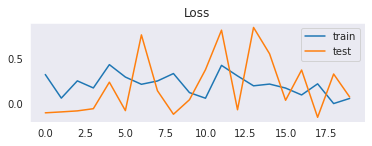

In [34]:
history = model.fit(X_tr3, Y_tr3, validation_data=(X_tst3,Y_tst3), epochs=20, batch_size=10)
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

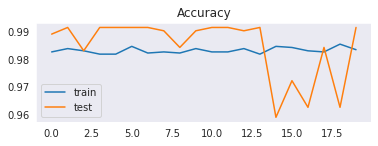

In [35]:
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

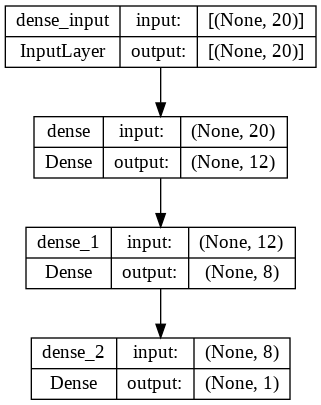

In [36]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [37]:
for i in Y_pred1:
  if(i>1):
    print(i)

In [38]:
LPred = list()
for i in Y_pred1:
  if(i > 0.5 and i<0.99):
    LPred.append(1)
  elif(i >= 0.99):
    LPred.append(2)
  else:
    LPred.append(0)
LPred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,


In [39]:
from collections import Counter
print(Counter(LPred))
Counter(Y_tst1)

Counter({0: 762, 2: 58, 1: 10})


Counter({0: 822, 2: 6, 1: 2})

Error: 7.469879518072286


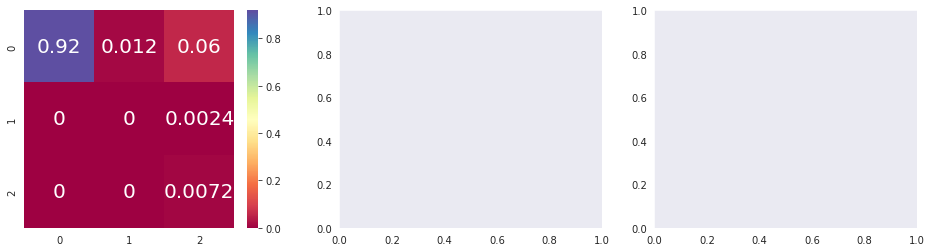

In [40]:
conf_mat1 = confusion_matrix(Y_tst1,LPred, normalize='all')
#conf_mat2 = confusion_matrix(Y_tst2,Y_pred2, normalize='all')
#conf_mat3 = confusion_matrix(Y_tst3,Y_pred3, normalize='all')

sns.set_style(style='dark')
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(16,4))
sns.heatmap(ax=ax1, data=conf_mat1, vmin=np.min(conf_mat1.all()),vmax=np.max(conf_mat1), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
#ax1.set_title('Confusion Matrix 1', fontdict={'fontsize':12}, pad=12)
#sns.heatmap(ax=ax2,data=conf_mat2, vmin=np.min(conf_mat2.all()),vmax=np.max(conf_mat2), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
#ax2.set_title('Confusion Matrix 2', fontdict={'fontsize':12}, pad=12)
#sns.heatmap(ax=ax3,data=conf_mat3, vmin=np.min(conf_mat3.all()),vmax=np.max(conf_mat3), annot=True,annot_kws={"fontsize":20},cmap='Spectral')
#ax3.set_title('Confusion Matrix 3', fontdict={'fontsize':12}, pad=12)

error1= (1-np.diag(conf_mat1).sum())*100
print("Error:", error1)
#error2= (1-np.diag(conf_mat2).sum())*100
#error3= (1-np.diag(conf_mat3).sum())*100
#mean_error = np.mean([error1,error2,error3])
#print("Errors = ({0:.2f}, {1:.2f}, {2:.2f})%".format(error1,error2,error3))
#print("Mean Error = {:.2f} %".format(mean_error))

In [41]:
# accuracy: (tp + tn) / (p + n)
accuracy = metrics.accuracy_score(Y_tst1, LPred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = metrics.precision_score(Y_tst1, LPred, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = metrics.recall_score(Y_tst1, LPred, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(Y_tst1, LPred, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.925301
Precision: 0.991109
Recall: 0.925301
F1 score: 0.954203


In [42]:
kappa = metrics.cohen_kappa_score(Y_tst1, LPred)
print('Cohens kappa: %f' % kappa)
matrix = metrics.confusion_matrix(Y_tst1, LPred)
print(matrix)

Cohens kappa: 0.172243
[[762  10  50]
 [  0   0   2]
 [  0   0   6]]


# Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, make_scorer, balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

nbg = GaussianNB()
nbg.fit(X_tr1, Y_tr1)
y_pred_n = nbg.predict(X_tst1)

nbg_acc=round(nbg.score(X_tr1, Y_tr1) * 100, 2)
nbg_acc_test=round(accuracy_score(Y_tst1, y_pred_n) * 100, 2)

print(f'Train Accuracy Score of GaussianNB: % {nbg_acc}')
print(f'Test Accuracy Score of GaussianNB: % {nbg_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1, support = score(Y_tst1, y_pred_n, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1}')

Train Accuracy Score of GaussianNB: % 98.23
Test Accuracy Score of GaussianNB: % 97.95
Precision : 0.7571627051180955
Recall    : 0.8268450932684509
F1-score   : 0.6949340816744131


# GMM ( Rough as Future Work )

In [44]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X_tr1)

GaussianMixture(n_components=3)

In [45]:
labels = gmm.predict(X_tr1)
d = X_tr1
d['labels'] = labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
#plt.scatter(d0[0], d0[1], c ='r')
#plt.scatter(d1[0], d1[1], c ='yellow')
#plt.scatter(d2[0], d2[1], c ='g')

In [46]:
d2

,P_STATUS,P_PERIOD,S_MAG,S_DISTANCE,S_RADIUS,S_TEMPERATURE,S_LOG_G,P_PERIASTRON,P_FLUX,P_TEMP_EQUIL,...,S_TYPE_TEMP,S_LUMINOSITY,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST,labels
1303,3.0,1.481124,7.55,205.65,2.36,10170.0,4.09,0.03462,44539.192,3701.0972,...,1,53.382199,0,0,1,0.04401,21.19811,915.34465,0.03462,2


In [47]:
print(gmm.lower_bound_)
print(gmm.n_iter_)

-50.0265485075886
2


# FINAL CALCULATIONS

In [48]:
Models_Used = ['Support Vector Classification', 'Logistic Regression', 'Naive Bayesian Network', 'K- Nearest Neighbors', 'K- Means Clustering', 'Decision Trees', 'Random Forest', 'Neural Network']
Accuracies = [99.0, 99.48, 98.23, 98.23, 70, 99.87, 99.88, 99.3]
Precisions = [0.9981884057971014, 0.9903498897800291, 0.7571627051180955, 0.9903614457831327, 0.623, 0.9987966446588297, 0.9989672977624785, 0.988308]
Recalls = [1.0, 0.9927536231884058, 0.8268450932684509, 1.0, 0.611, 0.9987951807228915, 0.9987951807228915, 0.984337]
F1 = [0.9989648033126294, 0.9915502961358525, 0.6949340816744131, 0.9951573849878935, 0.5, 0.9985947437165075, 0.9986407167130059, 0.985566]

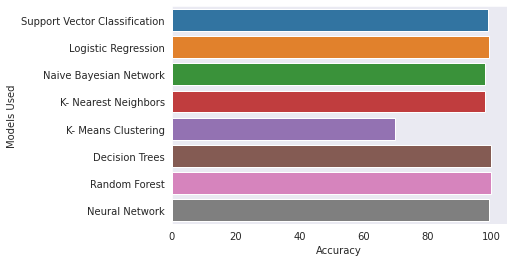

In [49]:
ax = sns.barplot(x=Accuracies, y=Models_Used, orient='h')
ax.set(xlabel='Accuracy', ylabel='Models Used')
plt.show()

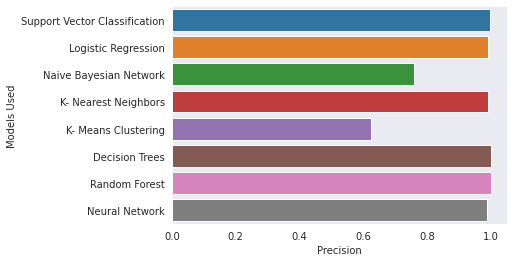

In [50]:
ax = sns.barplot(x=Precisions, y=Models_Used, orient='h')
ax.set(xlabel='Precision', ylabel='Models Used')
plt.show()

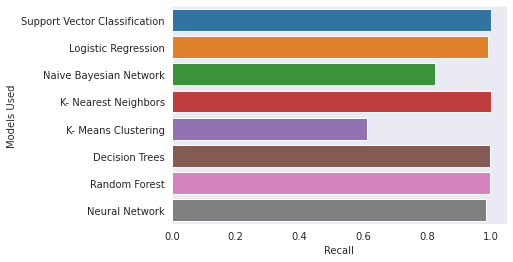

In [51]:
ax = sns.barplot(x=Recalls, y=Models_Used, orient='h')
ax.set(xlabel='Recall', ylabel='Models Used')
plt.show()

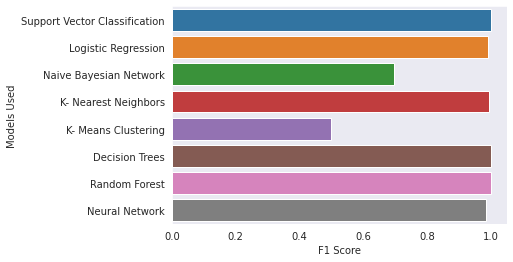

In [52]:
ax = sns.barplot(x=F1, y=Models_Used, orient='h')
ax.set(xlabel='F1 Score', ylabel='Models Used')
plt.show()

#THANK YOU